## Carga del dataset

In [11]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  file_path = filename
  print(f"Selected file: {file_path}")

df = pd.read_csv(file_path)

df_clean = df.copy() # para el dataset limpio

df.head()

Saving bike_buyers.csv to bike_buyers (1).csv
Selected file: bike_buyers (1).csv


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


## Tamaño y tipos de datos

In [6]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


## Valores faltantes

In [7]:
df.isna().sum()


,0
ID,0
Marital Status,7
Gender,11
Income,6
Children,8
Education,0
Occupation,0
Home Owner,4
Cars,9
Commute Distance,0


In [12]:
# Columnas categóricas con NA
cat_na = ['Marital Status', 'Gender', 'Home Owner']

for col in cat_na:
    moda = df_clean[col].mode()[0]   # categoría más frecuente
    df_clean[col].fillna(moda, inplace=True)

# Columnas numéricas con NA
num_na = ['Income', 'Children', 'Cars', 'Age']

for col in num_na:
    mediana = df_clean[col].median()
    df_clean[col].fillna(mediana, inplace=True)

# Verificar que ya no haya NA
df_clean.isna().sum()


/tmp/ipython-input-869189700.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(moda, inplace=True)
/tmp/ipython-input-869189700.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

,0
ID,0
Marital Status,0
Gender,0
Income,0
Children,0
Education,0
Occupation,0
Home Owner,0
Cars,0
Commute Distance,0


## Detección de outliers

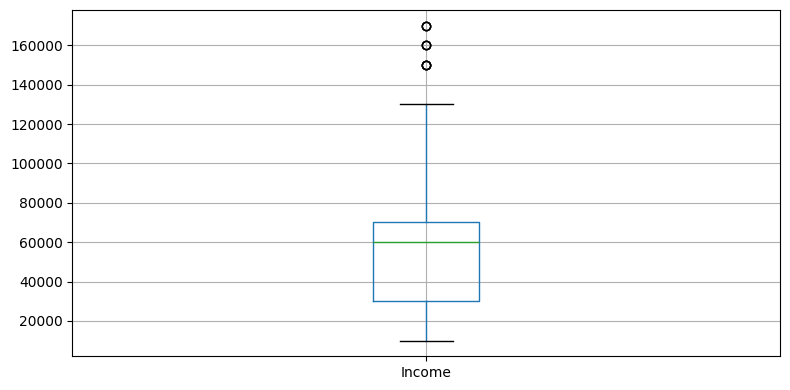

In [16]:
import matplotlib.pyplot as plt

df_clean[['Income']].boxplot(figsize=(8,4))
plt.tight_layout()
plt.show()

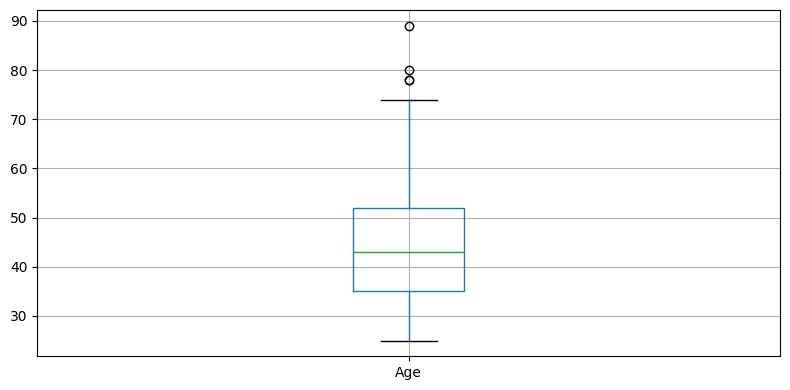

In [17]:
df_clean[['Age']].boxplot(figsize=(8,4))
plt.tight_layout()
plt.show()

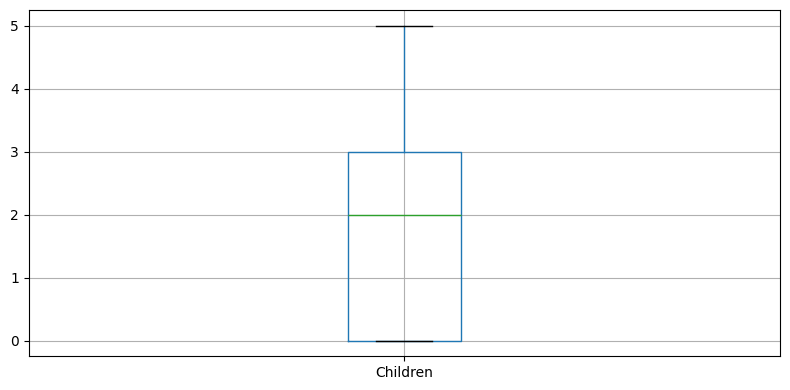

In [18]:
df_clean[['Children']].boxplot(figsize=(8,4))
plt.tight_layout()
plt.show()

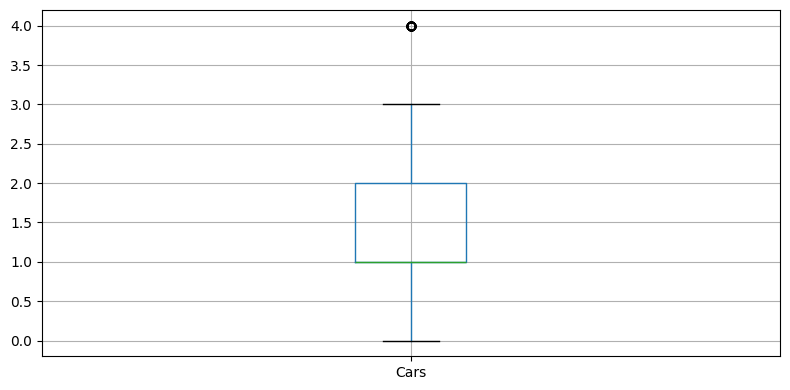

In [19]:
df_clean[['Cars']].boxplot(figsize=(8,4))
plt.tight_layout()
plt.show()

## Estadísticos de variables numéricas

In [13]:
df_clean.describe()


,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56290.000000,1.911000,1.451000,44.172000
std,5347.333948,30975.722678,1.620403,1.117519,11.316912
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


## Distribución de la variable objetivo

In [20]:
df_clean['Purchased Bike'].value_counts()

,count
Purchased Bike,
No,519
Yes,481


## Distribución de las variables categóricas

In [27]:
cat_cols = df_clean.select_dtypes(include=['object']).columns
cat_cols

for col in cat_cols:
    print(f'\n==== {col} ====')
    print(df[col].value_counts())


==== Marital Status ====
Marital Status
Married    535
Single     458
Name: count, dtype: int64

==== Gender ====
Gender
Male      500
Female    489
Name: count, dtype: int64

==== Education ====
Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

==== Occupation ====
Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64

==== Home Owner ====
Home Owner
Yes    682
No     314
Name: count, dtype: int64

==== Commute Distance ====
Commute Distance
0-1 Miles     366
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
Name: count, dtype: int64

==== Region ====
Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64

==== Purchased Bike ====
Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


## Creación de nuevas columnas

In [29]:
import numpy as np

df_clean['Con_hijos'] = np.where(df_clean['Children'] > 0, 'Si', 'No')
df_clean['Con_vehiculo'] = np.where(df_clean['Cars'] > 0, 'Si', 'No')

In [31]:
print(df_clean.shape)
print(df_clean.isna().sum())
print(df_clean[['Con_hijos','Con_vehiculo']].head())

(1000, 15)
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
Con_hijos           0
Con_vehiculo        0
dtype: int64
  Con_hijos Con_vehiculo
0        Si           No
1        Si           Si
2        Si           Si
3        No           Si
4        No           No


## REQUERIMIENTOS

## 1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

  Purchased Bike    Income
0             No  54874.76
1            Yes  57817.05


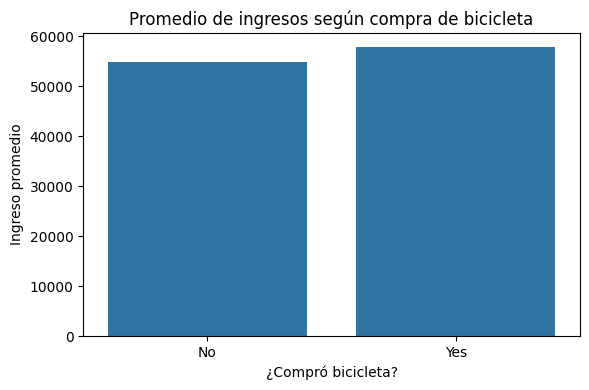

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tabla de promedio de ingresos según Purchased Bike
ingreso_por_compra = (
    df_clean.groupby('Purchased Bike')['Income']
    .mean()
    .reset_index()
)

# Redondeamos
ingreso_por_compra['Income'] = ingreso_por_compra['Income'].round(2)

print(ingreso_por_compra)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(
    data=ingreso_por_compra,
    x='Purchased Bike',
    y='Income'
)
plt.title('Promedio de ingresos según compra de bicicleta')
plt.xlabel('¿Compró bicicleta?')
plt.ylabel('Ingreso promedio')
plt.tight_layout()
plt.show()


## 2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?

  Marital Status    Income
0        Married  58653.14
1         Single  53493.45


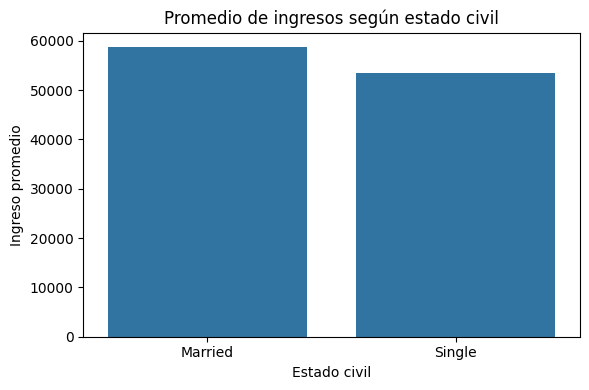

In [33]:
# Tabla de promedio de ingresos según estado civil
ingreso_por_estado = (
    df_clean.groupby('Marital Status')['Income']
    .mean()
    .reset_index()
)

ingreso_por_estado['Income'] = ingreso_por_estado['Income'].round(2)
print(ingreso_por_estado)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(
    data=ingreso_por_estado,
    x='Marital Status',
    y='Income'
)
plt.title('Promedio de ingresos según estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Ingreso promedio')
plt.tight_layout()
plt.show()


## 3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?



             Education  Children
0            Bachelors      2.54
1      Graduate Degree      2.74
2          High School      2.76
3      Partial College      2.57
4  Partial High School      2.71


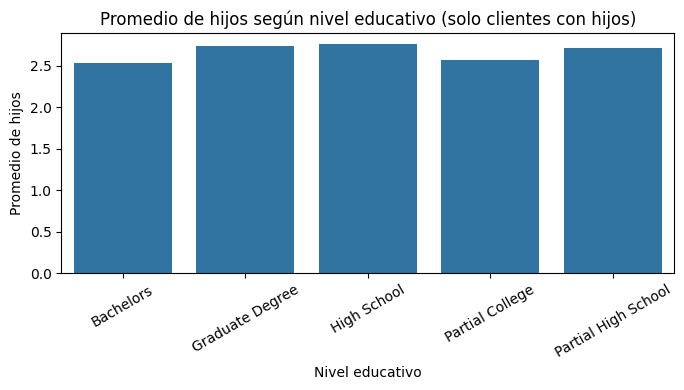

             Education  Children
0            Bachelors         3
1      Graduate Degree         3
2          High School         3
3      Partial College         3
4  Partial High School         3


In [35]:
# Nos quedamos solo con clientes que SÍ tienen hijos
df_hijos = df_clean[df_clean['Con_hijos'] == 'Si']

# Promedio de hijos según nivel educativo
hijos_por_edu = (
    df_hijos.groupby('Education')['Children']
    .mean()
    .reset_index()
)

hijos_por_edu['Children'] = hijos_por_edu['Children'].round(2)
print(hijos_por_edu)

# Gráfico de barras
plt.figure(figsize=(7,4))
sns.barplot(
    data=hijos_por_edu,
    x='Education',
    y='Children'
)
plt.title('Promedio de hijos según nivel educativo (solo clientes con hijos)')
plt.xlabel('Nivel educativo')
plt.ylabel('Promedio de hijos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

hijos_por_edu = (
    df_hijos.groupby('Education')['Children']
    .mean()
    .reset_index()
)

# Redondear al entero más cercano
hijos_por_edu['Children'] = hijos_por_edu['Children'].round().astype(int)

print(hijos_por_edu)


## 4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?



       Occupation      Cars  Cars_promedio  Cars_redondeado
0        Clerical  1.480000           1.48                1
1      Management  2.345912           2.35                2
2          Manual  1.441860           1.44                1
3    Professional  2.126126           2.13                2
4  Skilled Manual  1.712821           1.71                2


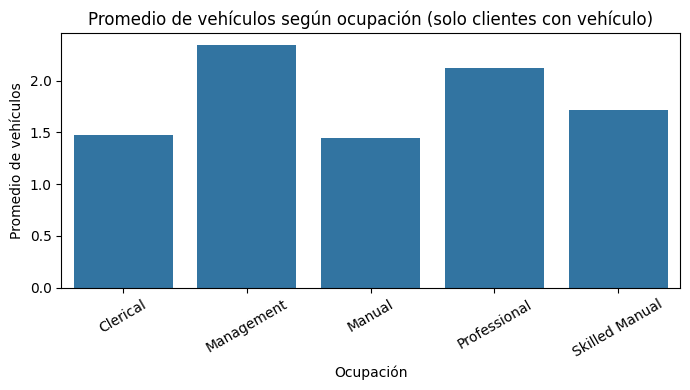

In [36]:
# Nos quedamos solo con clientes que SÍ tienen vehículo
df_veh = df_clean[df_clean['Con_vehiculo'] == 'Si']

# Promedio de vehículos según ocupación
veh_por_ocup = (
    df_veh.groupby('Occupation')['Cars']
    .mean()
    .reset_index()
)

# Promedio con decimales y también entero redondeado
veh_por_ocup['Cars_promedio'] = veh_por_ocup['Cars'].round(2)
veh_por_ocup['Cars_redondeado'] = veh_por_ocup['Cars'].round().astype(int)

print(veh_por_ocup)

# Gráfico de barras con el promedio (decimal)
plt.figure(figsize=(7,4))
sns.barplot(
    data=veh_por_ocup,
    x='Occupation',
    y='Cars'
)
plt.title('Promedio de vehículos según ocupación (solo clientes con vehículo)')
plt.xlabel('Ocupación')
plt.ylabel('Promedio de vehículos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## 5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?



  Home Owner    Age
0         No  42.31
1        Yes  45.02


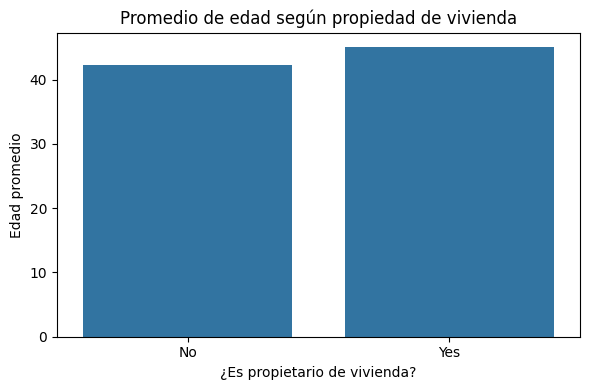

In [37]:
# Promedio de edad según si es propietario o no
edad_por_home = (
    df_clean.groupby('Home Owner')['Age']
    .mean()
    .reset_index()
)

edad_por_home['Age'] = edad_por_home['Age'].round(2)
print(edad_por_home)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(
    data=edad_por_home,
    x='Home Owner',
    y='Age'
)
plt.title('Promedio de edad según propiedad de vivienda')
plt.xlabel('¿Es propietario de vivienda?')
plt.ylabel('Edad promedio')
plt.tight_layout()
plt.show()


## Construcción del modelo (Regresión Logística)

In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Preparar variables (x, y) y dummies

In [43]:
# Partimos del df_clean ya preparado
df_model = df_clean.copy()

# Variable objetivo: Purchased Bike (Yes/No) → 1/0
df_model['Purchased Bike'] = df_model['Purchased Bike'].map({'No': 0, 'Yes': 1})

# Eliminamos ID porque no aporta al modelo
df_model = df_model.drop(columns=['ID'])

# Identificamos variables categóricas para dummificar
cat_cols = [
    'Marital Status',
    'Gender',
    'Education',
    'Occupation',
    'Home Owner',
    'Commute Distance',
    'Region',
    'Con_hijos',
    'Con_vehiculo'
]

# One-hot encoding (drop_first=True para evitar multicolinealidad perfecta)
df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

# Separar X e y
X = df_model.drop(columns=['Purchased Bike'])
y = df_model['Purchased Bike']

X.shape, y.shape


((1000, 23), (1000,))

## Train/Test split + escalado

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Escalamos las variables (regresión logística lo agradece)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


## Entrenar el modelo de regresión logística

In [45]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Evaluar el modelo

In [46]:
# Predicciones
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.63
Precision: 0.6240601503759399
Recall: 0.5763888888888888
F1-score: 0.5992779783393501

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       156
           1       0.62      0.58      0.60       144

    accuracy                           0.63       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.63      0.63      0.63       300



## Matriz de confusión

<Figure size 400x400 with 0 Axes>

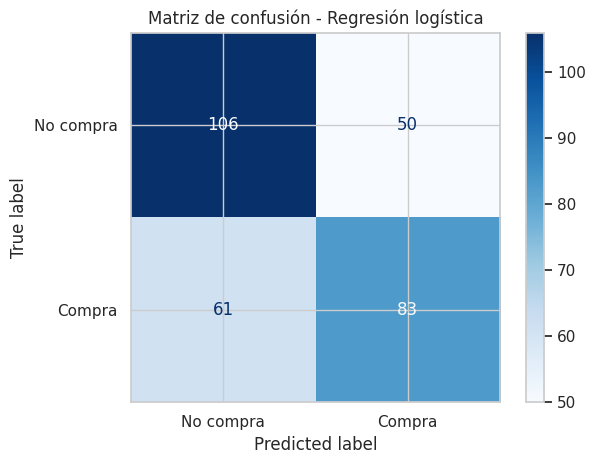

In [47]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No compra', 'Compra'])
plt.figure(figsize=(4,4))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de confusión - Regresión logística')
plt.tight_layout()
plt.show()


## Curva ROC

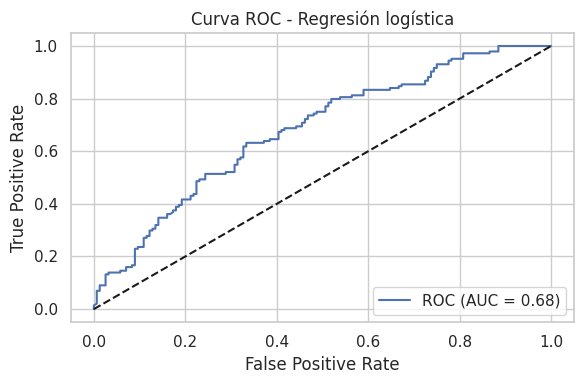

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión logística')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Coeficientes del modelo (para interpretar después)

In [49]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_reg.coef_[0]
})

coef_df = coef_df.sort_values('Coeficiente', ascending=False)
coef_df.head(15)


,Variable,Coeficiente
0,Income,0.475877
4,Marital Status_Single,0.367681
20,Region_Pacific,0.308092
12,Occupation_Professional,0.250575
21,Con_hijos_Si,0.192721
14,Home Owner_Yes,0.179437
7,Education_High School,0.105813
11,Occupation_Manual,0.093625
17,Commute Distance_2-5 Miles,0.036026
13,Occupation_Skilled Manual,0.026948


## Ajustar hiperparámetros para mejorar el modelo

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

log_reg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='f1'   # o 'roc_auc'
)

grid.fit(X_train_scaled, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_


{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


## Ajustar el umbral de decisión


In [53]:
# Bajando el umbral normalmente sube el recall de “compra”

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

umbral = 0.4 # jugando con el umbral
y_pred_04 = (y_proba >= umbral).astype(int)

print("Recall (0.4):", recall_score(y_test, y_pred_04))
print("Precision (0.4):", precision_score(y_test, y_pred_04))


Recall (0.4): 0.75
Precision (0.4): 0.5806451612903226


## Validación cruzada

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    log_reg,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='f1'
)

print("F1 medio (CV):", scores.mean())
print("Desviación:", scores.std())


F1 medio (CV): 0.5990773356470838
Desviación: 0.07748411394380332
